# Application Programming Interface (API)

In [1]:
# An API acts as an intermediary between server and a client. 
# The application or person who is submitting a request is a client
# The server is the application who sends response to that request

In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '9eafb004-7d4c-475e-95dc-e098ea41ced0',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-03-27T00:01:11.899Z', 'error_code': 0, 'error_message': None, 'elapsed': 57, 'credit_count': 1, 'notice': None, 'total_count': 9082}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10121, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [3]:
# Now check the type of data we pulled through API

type(data)

dict

In [4]:
import pandas as pd

pd.set_option('display.max_columns', None)# This allows you to see all columns, not just like 15
pd.set_option('display.max_rows',None)

In [5]:
df = pd.json_normalize(data['data']) # Normalise json Data and makes it pretty in a Data-Frame 
df["Time-stamp"] = pd.to_datetime('now')
df

C:\Users\Aryan Ali Mullick\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Time-stamp
0,1,Bitcoin,BTC,bitcoin,10121,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.932913e+07,1.932913e+07,NaN,1,NaN,NaN,None,2023-03-26T23:59:00.000Z,27994.329514,1.387836e+10,3.7014,-0.278687,1.817159,-0.158158,20.674953,21.093950,65.453025,5.411061e+11,46.3904,5.878809e+11,None,2023-03-26T23:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-27 00:01:13.241455
1,1027,Ethereum,ETH,ethereum,6639,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2023-03-26T23:59:00.000Z,1775.676750,6.990313e+09,5.6847,-0.114053,1.830061,-0.554433,10.402038,10.173394,44.719958,2.172964e+11,18.6280,2.172964e+11,None,2023-03-26T23:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-27 00:01:13.241455
2,825,Tether,USDT,tether,50191,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.902229e+10,8.309174e+10,NaN,3,NaN,NaN,None,2023-03-26T23:59:00.000Z,1.000893,2.143104e+10,-4.9392,0.017284,0.004477,-0.210781,0.082299,0.071760,0.089817,7.909287e+10,6.7808,8.316595e+10,None,2023-03-26T23:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-27 00:01:13.241455
3,1839,BNB,BNB,bnb,1231,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578895e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-03-26T23:59:00.000Z,328.887990,3.632161e+08,-17.2746,-0.020315,1.926077,-2.400820,8.883940,7.022386,34.680711,5.192798e+10,4.4502,5.261549e+10,None,2023-03-26T23:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-27 00:01:13.241455
4,3408,USD Coin,USDC,usd-coin,11164,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.388308e+10,3.388308e+10,NaN,5,NaN,NaN,None,2023-03-26T23:59:00.000Z,0.999885,3.302521e+09,-9.0435,0.008474,0.014885,0.003976,-0.016015,-0.017773,-0.021810,3.387917e+10,2.9031,3.387917e+10,None,2023-03-26T23:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-27 00:01:13.241455
5,52,XRP,XRP,xrp,908,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.095091e+10,9.998911e+10,NaN,6,NaN,NaN,None,2023-03-26T23:59:00.000Z,0.448817,1.090502e+09,-40.4997,-0.430638,0.922080,15.536114,18.585159,7.451511,22.720594,2.286764e+10,1.9597,4.488171e+10,None,2023-03-26T23:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-27 00:01:13.241455
6,2010,Cardano,ADA,cardano,746,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.473101e+10,3.562624e+10,NaN,7,NaN,NaN,None,2023-03-26T23:59:00.000Z,0.356245,2.199188e+08,3.9998,-0.145811,1.207304,2.958233,-2.617084,-4.596723,34.281609,1.237277e+10,1.0607,1.603104e+10,None,2023-03-26T23:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-27 00:01:13.241455
7,3890,Polygon,MATIC,polygon,634,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,9.080469e+09,1.000000e+10,NaN,8,NaN,NaN,None,2023-03-26T23:59:00.000Z,1.105598,2.742322e+08,-12.5716,-0.316199,2.445722,-5.420116,-12.666977,11.269385,35.903614,1.003935e+10,0.8606,1.105598e+10,None,2023-03-26T23:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-27 00:01:13.241455
8,74,Dogecoin,DOGE,dogecoin,667,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,NaN,9,NaN,NaN,None,2023-03-26T23

In [6]:
# Creating an API running function
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '9eafb004-7d4c-475e-95dc-e098ea41ced0',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data']) # Normalise json Data and makes it pretty in a Data-Frame 
    df2["Time-stamp"] = pd.to_datetime('now')
    #df = df.append(df2)
    df_append = pd.DataFrame(df2)
    df = pd.concat([df,df_append])
    
    if not os.path.isfile(r"C:\Users\Aryan Ali Mullick\Desktop\Coursera Courses\Alex the analyst bootcamp\Python\Projects\API.csv"):
        df.to_csv(r"C:\Users\Aryan Ali Mullick\Desktop\Coursera Courses\Alex the analyst bootcamp\Python\Projects\API.csv",header="column_names")
    else:
        df.to_csv(r"C:\Users\Aryan Ali Mullick\Desktop\Coursera Courses\Alex the analyst bootcamp\Python\Projects\API.csv",mode = "a",header = False)
        

In [7]:
import os
# To track time
from time import time
from time import sleep

for i in range(333): # Since we have api running limit of 333 per day
    api_runner()
    print("API Runner completed Successfully")
    sleep(60) # Sleep for 1 minute
exit()

C:\Users\Aryan Ali Mullick\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed Successfully


C:\Users\Aryan Ali Mullick\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed Successfully


C:\Users\Aryan Ali Mullick\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed Successfully


KeyboardInterrupt: 

In [8]:
df3 = pd.read_csv(r"C:\Users\Aryan Ali Mullick\Desktop\Coursera Courses\Alex the analyst bootcamp\Python\Projects\API.csv")
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Time-stamp
0,0,1,Bitcoin,BTC,bitcoin,10121,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.932913e+07,1.932913e+07,NaN,1,NaN,NaN,NaN,2023-03-26T23:59:00.000Z,27994.329514,1.387836e+10,3.7014,-0.278687,1.817159,-0.158158,20.674953,21.093950,65.453025,5.411061e+11,46.3904,5.878809e+11,NaN,2023-03-26T23:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-27 00:01:13.241455
1,1,1027,Ethereum,ETH,ethereum,6639,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2023-03-26T23:59:00.000Z,1775.676750,6.990313e+09,5.6847,-0.114053,1.830061,-0.554433,10.402038,10.173394,44.719958,2.172964e+11,18.6280,2.172964e+11,NaN,2023-03-26T23:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-27 00:01:13.241455
2,2,825,Tether,USDT,tether,50191,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,7.902229e+10,8.309174e+10,NaN,3,NaN,NaN,NaN,2023-03-26T23:59:00.000Z,1.000893,2.143104e+10,-4.9392,0.017284,0.004477,-0.210781,0.082299,0.071760,0.089817,7.909287e+10,6.7808,8.316595e+10,NaN,2023-03-26T23:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-27 00:01:13.241455
3,3,1839,BNB,BNB,bnb,1231,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.578895e+08,1.599800e+08,NaN,4,NaN,NaN,NaN,2023-03-26T23:59:00.000Z,328.887990,3.632161e+08,-17.2746,-0.020315,1.926077,-2.400820,8.883940,7.022386,34.680711,5.192798e+10,4.4502,5.261549e+10,NaN,2023-03-26T23:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-27 00:01:13.241455
4,4,3408,USD Coin,USDC,usd-coin,11164,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.388308e+10,3.388308e+10,NaN,5,NaN,NaN,NaN,2023-03-26T23:59:00.000Z,0.999885,3.302521e+09,-9.0435,0.008474,0.014885,0.003976,-0.016015,-0.017773,-0.021810,3.387917e+10,2.9031,3.387917e+10,NaN,2023-03-26T23:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-27 00:01:13.241455
5,5,52,XRP,XRP,xrp,908,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.095091e+10,9.998911e+10,NaN,6,NaN,NaN,NaN,2023-03-26T23:59:00.000Z,0.448817,1.090502e+09,-40.4997,-0.430638,0.922080,15.536114,18.585159,7.451511,22.720594,2.286764e+10,1.9597,4.488171e+10,NaN,2023-03-26T23:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-27 00:01:13.241455
6,6,2010,Cardano,ADA,cardano,746,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.473101e+10,3.562624e+10,NaN,7,NaN,NaN,NaN,2023-03-26T23:59:00.000Z,0.356245,2.199188e+08,3.9998,-0.145811,1.207304,2.958233,-2.617084,-4.596723,34.281609,1.237277e+10,1.0607,1.603104e+10,NaN,2023-03-26T23:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-27 00:01:13.241455
7,7,3890,Polygon,MATIC,polygon,634,2019-04-28T00:00:00.000Z,"['platform', 'enterprise-solutions', 'zero-kno...",1.000000e+10,9.080469e+09,1.000000e+10,NaN,8,NaN,NaN,NaN,2023-03-26T23:59:00.000Z,1.105598,2.742322e+08,-12.5716,-0.316199,2.445722,-5.420116,-12.666977,11.269385,35.903614,1.003935e+10,0.8606,1.105598e+10,NaN,2023-03-26T23:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-27 00:01:13.241455
8,8,74,Dogecoin,DOGE,dogecoin,667,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.326708e+11,1.326708e+11,NaN,9,NaN,NaN,NaN,2

In [9]:
# Converting type of column max_supply
pd.set_option("display.float_format", lambda x: "%.5f" % x)


In [10]:
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Time-stamp
0,0,1,Bitcoin,BTC,bitcoin,10121,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19329131.00000,19329131.00000,NaN,1,NaN,NaN,NaN,2023-03-26T23:59:00.000Z,27994.32951,13878363191.95012,3.70140,-0.27869,1.81716,-0.15816,20.67495,21.09395,65.45303,541106062437.57721,46.39040,587880919798.68005,NaN,2023-03-26T23:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-27 00:01:13.241455
1,1,1027,Ethereum,ETH,ethereum,6639,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,NaN,2023-03-26T23:59:00.000Z,1775.67675,6990313307.24827,5.68470,-0.11405,1.83006,-0.55443,10.40204,10.17339,44.71996,217296429099.18320,18.62800,217296429099.17999,NaN,2023-03-26T23:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-27 00:01:13.241455
2,2,825,Tether,USDT,tether,50191,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,79022291662.57704,83091735571.98807,NaN,3,NaN,NaN,NaN,2023-03-26T23:59:00.000Z,1.00089,21431041961.93737,-4.93920,0.01728,0.00448,-0.21078,0.08230,0.07176,0.08982,79092873689.20856,6.78080,83165952390.67999,NaN,2023-03-26T23:59:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-27 00:01:13.241455
3,3,1839,BNB,BNB,bnb,1231,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,157889545.95798,159979963.59043,NaN,4,NaN,NaN,NaN,2023-03-26T23:59:00.000Z,328.88799,363216135.78772,-17.27460,-0.02031,1.92608,-2.40082,8.88394,7.02239,34.68071,51927975468.21270,4.45020,52615488722.35000,NaN,2023-03-26T23:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-27 00:01:13.241455
4,4,3408,USD Coin,USDC,usd-coin,11164,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,33883082551.47732,33883082551.47732,NaN,5,NaN,NaN,NaN,2023-03-26T23:59:00.000Z,0.99988,3302521189.32505,-9.04350,0.00847,0.01489,0.00398,-0.01601,-0.01777,-0.02181,33879174436.69429,2.90310,33879174436.69000,NaN,2023-03-26T23:59:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-27 00:01:13.241455
5,5,52,XRP,XRP,xrp,908,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,50950912949.00000,99989113908.00000,NaN,6,NaN,NaN,NaN,2023-03-26T23:59:00.000Z,0.44882,1090501587.74272,-40.49970,-0.43064,0.92208,15.53611,18.58516,7.45151,22.72059,22867642500.52758,1.95970,44881712960.51000,NaN,2023-03-26T23:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-27 00:01:13.241455
6,6,2010,Cardano,ADA,cardano,746,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34731014773.55800,35626240479.45000,NaN,7,NaN,NaN,NaN,2023-03-26T23:59:00.000Z,0.35625,219918828.25673,3.99980,-0.14581,1.20730,2.95823,-2.61708,-4.59672,34.28161,12372765630.65158,1.06070,16031044788.34000,NaN,2023-03-26T23:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-27 00:01:13.241455
7,7,3890,Polygon,MATIC,polygon,634,2019-04-28T00:00:00.000Z,"['platform', 'enterprise-solutions', 'zero-kno...",10000000000.00000,9080469069.28493,10000000000.00000,NaN,8,NaN,NaN,NaN,2023-03-26T23:59:00.000Z,1.10560,274232223.70717,-12.57160,-0.31620,2.44572,-5.42012,-12.66698,11.26939,35.90361,10039352278.76236,0.86060,11055984225.22000,NaN,2023-03-26T23:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-27 00:01:13.2

In [11]:
df4 = df.groupby("name", sort=False)[["quote.USD.percent_change_1h", "quote.USD.percent_change_24h","quote.USD.percent_change_7d","quote.USD.percent_change_30d","quote.USD.percent_change_60d","quote.USD.percent_change_90d"]].mean()
df4


,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.23899,1.82219,-0.17670,20.66918,21.12854,65.45303
Ethereum,-0.08261,1.83549,-0.56915,10.39617,10.20189,44.70597
Tether,0.02656,0.00043,-0.20920,0.08028,0.06953,0.08896
BNB,-0.01662,1.93013,-2.43679,8.86306,7.05926,34.66274
USD Coin,0.01243,0.01480,0.00569,-0.01694,-0.01696,-0.02282
XRP,-0.41202,0.96293,15.58537,18.59023,7.50177,22.71632
Cardano,-0.13839,1.21627,2.95798,-2.61867,-4.58312,34.28675
Polygon,-0.29895,2.44923,-5.42930,-12.65943,11.32047,35.85802
Dogecoin,-0.10290,0.49987,-0.52713,-8.01231,-14.03578,-1.77130


In [12]:
# Stacking the upper data frame for easy visual
df5 = df4.stack()
df5

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.23899
             quote.USD.percent_change_24h     1.82219
             quote.USD.percent_change_7d     -0.17670
             quote.USD.percent_change_30d    20.66918
             quote.USD.percent_change_60d    21.12854
             quote.USD.percent_change_90d    65.45303
Ethereum     quote.USD.percent_change_1h     -0.08261
             quote.USD.percent_change_24h     1.83549
             quote.USD.percent_change_7d     -0.56915
             quote.USD.percent_change_30d    10.39617
             quote.USD.percent_change_60d    10.20189
             quote.USD.percent_change_90d    44.70597
Tether       quote.USD.percent_change_1h      0.02656
             quote.USD.percent_change_24h     0.00043
             quote.USD.percent_change_7d     -0.20920
             quote.USD.percent_change_30d     0.08028
             quote.USD.percent_change_60d     0.06953
             quote.USD.percent_change_90

In [15]:
type(df5) # Type changed from DataFrame to Series, We nee to change that

pandas.core.frame.DataFrame

In [17]:
df6 = df5.to_frame(name="values")
df6

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.23899
            quote.USD.percent_change_24h   1.82219
            quote.USD.percent_change_7d   -0.17670
            quote.USD.percent_change_30d  20.66918
            quote.USD.percent_change_60d  21.12854
            quote.USD.percent_change_90d  65.45303
Ethereum    quote.USD.percent_change_1h   -0.08261
            quote.USD.percent_change_24h   1.83549
            quote.USD.percent_change_7d   -0.56915
            quote.USD.percent_change_30d  10.39617
            quote.USD.percent_change_60d  10.20189
            quote.USD.percent_change_90d  44.70597
Tether      quote.USD.percent_change_1h    0.02656
            quote.USD.percent_change_24h   0.00043
            quote.USD.percent_change_7d   -0.20920
            quote.USD.percent_change_30d   0.08028
            quote.USD.percent_change_60d   0.06953
            quote.USD.percent_change_90d   0.08896
BNB         quote.USD.percent_change_1h   -0.01662
            quote.USD.percent_change_24h   1.93013
            quote.USD.percent_change_7d   -2.43679
            quote.USD.percent_change_30d   8.86306
            quote.USD.percent_change_60d   7.05926
            quote.USD.percent_change_90d  34.66274
USD Coin    quote.USD.percent_change_1h    0.01243
            quote.USD.percent_change_24h   0.01480
            quote.USD.percent_change_7d    0.00569
            quote.USD.percent_change_30d  -0.01694
            quote.USD.percent_change_60d  -0.01696
            quote.USD.percent_change_90d  -0.02282
XRP         quote.USD.percent_change_1h   -0.41202
            quote.USD.percent_change_24h   0.96293
            quote.USD.percent_change_7d   15.58537
            quote.USD.percent_change_30d  18.59023
            quote.USD.percent_change_60d   7.50177
            quote.USD.percent_change_90d  22.71632
Cardano     quote.USD.percent_change_1h   -0.13839
            quote.USD.percent_change_24h   1.21627
            quote.USD.percent_change_7d    2.95798
            quote.USD.percent_change_30d  -2.61867
            quote.USD.percent_change_60d  -4.58312
            quote.USD.percent_change_90d  34.28675
Polygon     quote.USD.percent_change_1h   -0.29895
            quote.USD.percent_change_24h   2.44923
            quote.USD.percent_change_7d   -5.42930
            quote.USD.percent_change_30d -12.65943
            quote.USD.percent_change_60d  11.32047
            quote.USD.percent_change_90d  35.85802
Dogecoin    quote.USD.percent_change_1h   -0.10290
            quote.USD.percent_change_24h   0.49987
            quote.USD.percent_change_7d   -0.52713
            quote.USD.percent_change_30d  -8.01231
            quote.USD.percent_change_60d -14.03578
            quote.USD.percent_change_90d  -1.77130
Solana      quote.USD.percent_change_1h   -0.31129
            quote.USD.percent_change_24h   2.60511
            quote.USD.percent_change_7d   -4.26276
            quote.USD.percent_change_30d  -9.02920
            quote.USD.percent_change_60d -14.60923
            quote.USD.percent_change_90d  85.41674
Binance USD quote.USD.percent_change_1h    0.02440
            quote.USD.percent_change_24h   0.03548
            quote.USD.percent_change_7d   -0.01370
            quote.USD.percent_change_30d  -0.03339
            quote.USD.percent_change_60d  -0.02095
            quote.USD.percent_change_90d  -0.01554
Polkadot    quote.USD.percent_change_1h   -0.11067
            quote.USD.percent_change_24h   2.42041
            quote.USD.percent_change_7d   -6.46523
            quote.USD.percent_change_30d  -8.50161
            quote.USD.percent_change_60d  -5.49424
            quote.USD.percent_change_90d  32.37064
Litecoin    quote.USD.percent_change_1h   -0.82455
            quote.USD.percent_change_24h   2.12006
            quote.USD.percent_change_7d   10.77840
            quote.USD.percent_change_30d   2.14004
            quote.USD.percent_change_60d   4.63878
            quo

In [18]:
type(df6)

pandas.core.frame.DataFrame

In [19]:
df6.count()

values    90
dtype: int64

In [21]:
index = pd.Index(range(90))

df7 = df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.23899
1,Bitcoin,quote.USD.percent_change_24h,1.82219
2,Bitcoin,quote.USD.percent_change_7d,-0.17670
3,Bitcoin,quote.USD.percent_change_30d,20.66918
4,Bitcoin,quote.USD.percent_change_60d,21.12854
5,Bitcoin,quote.USD.percent_change_90d,65.45303
6,Ethereum,quote.USD.percent_change_1h,-0.08261
7,Ethereum,quote.USD.percent_change_24h,1.83549
8,Ethereum,quote.USD.percent_change_7d,-0.56915
9,Ethereum,quote.USD.percent_change_30d,10.39617


In [23]:
df8 = df7.rename(columns={"level_1": "percent_change"})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.23899
1,Bitcoin,quote.USD.percent_change_24h,1.82219
2,Bitcoin,quote.USD.percent_change_7d,-0.17670
3,Bitcoin,quote.USD.percent_change_30d,20.66918
4,Bitcoin,quote.USD.percent_change_60d,21.12854
5,Bitcoin,quote.USD.percent_change_90d,65.45303
6,Ethereum,quote.USD.percent_change_1h,-0.08261
7,Ethereum,quote.USD.percent_change_24h,1.83549
8,Ethereum,quote.USD.percent_change_7d,-0.56915
9,Ethereum,quote.USD.percent_change_30d,10.39617


In [24]:
# Now that we formatted the data, its time for some visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df8["percent_change"] = df8["percent_change"].replace(["quote.USD.percent_change_1h", "quote.USD.percent_change_24h","quote.USD.percent_change_7d","quote.USD.percent_change_30d","quote.USD.percent_change_60d","quote.USD.percent_change_90d"],['1h','24h','7d','30d','60d','90d'])
df8

,name,percent_change,values
0,Bitcoin,1h,-0.23899
1,Bitcoin,24h,1.82219
2,Bitcoin,7d,-0.17670
3,Bitcoin,30d,20.66918
4,Bitcoin,60d,21.12854
5,Bitcoin,90d,65.45303
6,Ethereum,1h,-0.08261
7,Ethereum,24h,1.83549
8,Ethereum,7d,-0.56915
9,Ethereum,30d,10.39617


<Figure size 1368x1224 with 0 Axes>

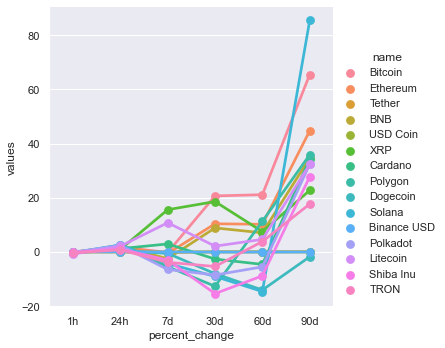

In [34]:
plt.figure(figsize=(19,17))
sns.catplot(x='percent_change', y='values', hue='name', data=df8, kind='point')
plt.show()

In [42]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df3[['name','quote.USD.price','Time-stamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,Time-stamp
0,Bitcoin,27994.32951,2023-03-27 00:01:13.241455
15,Bitcoin,27994.32951,2023-03-27 00:01:14.056423
30,Bitcoin,27994.32951,2023-03-27 00:01:13.241455
45,Bitcoin,27994.32951,2023-03-27 00:01:14.056423
60,Bitcoin,27994.06792,2023-03-27 00:02:14.832892
75,Bitcoin,27994.32951,2023-03-27 00:01:13.241455
90,Bitcoin,27994.32951,2023-03-27 00:01:14.056423
105,Bitcoin,27994.06792,2023-03-27 00:02:14.832892
120,Bitcoin,27990.38870,2023-03-27 00:03:15.693954


<AxesSubplot:xlabel='Time-stamp', ylabel='quote.USD.price'>

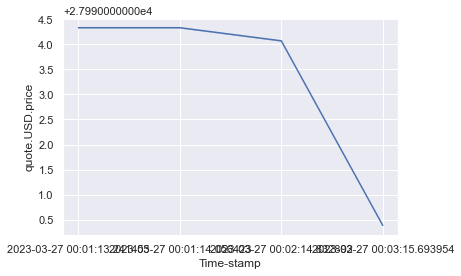

In [43]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='Time-stamp', y='quote.USD.price', data = df10)
 